In [0]:
# filesモジュールをインポート
from google.colab import files
uploaded = files.upload()


Saving kmnist-test-imgs.npz to kmnist-test-imgs.npz
Saving kmnist-train-imgs.npz to kmnist-train-imgs.npz
Saving kmnist-train-labels.npz to kmnist-train-labels.npz


In [0]:
# データ処理ラブラり
import numpy as np
import pandas as pd
# データ可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline 
# LightGBM
import lightgbm as lgb
# Scikit-learn（評価算出）
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [0]:
# 訓練データの読み込み
X_train = np.load('kmnist-train-imgs.npz')['arr_0']
y_train = np.load('kmnist-train-labels.npz')['arr_0']
# テストデータの読み込み
X_test = np.load('kmnist-test-imgs.npz')['arr_0']

# データのサイズ確認
print(X_train.shape)
print(X_test.shape)

print(y_train[0:5])


(60000, 28, 28)
(10000, 28, 28)
[8 7 0 1 4]


0
255
1


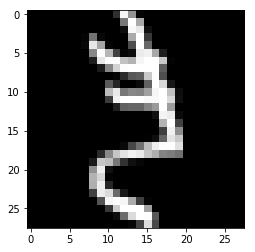

In [0]:
print(X_train.min())
print(X_train.max())

print(y_train[423])

plt.imshow(X_train[423], cmap = plt.cm.gray)
plt.show()


In [0]:
# 処理前データ確認
X_train[0,10:15,10:15]


array([[  0,   0, 133,  91,   7],
       [  0,   0, 128, 128,  20],
       [  0,   0,  95, 224,  20],
       [  0,   0, 112, 159,  64],
       [  0,   1, 211, 234, 253]], dtype=uint8)

In [0]:
# 訓練/テストデータの正規化
X_train = X_train / 255 
X_test = X_test/ 255

# 処理後データ確認
X_train[0,10:15,10:15]


array([[0.        , 0.        , 0.52156863, 0.35686275, 0.02745098],
       [0.        , 0.        , 0.50196078, 0.50196078, 0.07843137],
       [0.        , 0.        , 0.37254902, 0.87843137, 0.07843137],
       [0.        , 0.        , 0.43921569, 0.62352941, 0.25098039],
       [0.        , 0.00392157, 0.82745098, 0.91764706, 0.99215686]])

In [0]:
# 処理前データ確認
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# 処理後データ確認
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [0]:
# # 訓練・テストデータの設定
# train_data = lgb.Dataset(X_train, label=y_train)
# eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)


In [0]:
# validation_size = 0.3
np.random.seed()
perm_idx = np.random.permutation(len(X_train))
# perm_idx
_X_train = X_train[perm_idx]
_y_train = y_train[perm_idx]

# split train and validation
validation_num = int(len(y_train) * validation_size)
print(validation_num)
# _y_train

validation_imgs = _X_train[:validation_num]
validation_lbls = _y_train[:validation_num]

train_imgs = _X_train[validation_num:]
train_lbls = _y_train[validation_num:]


18000


In [0]:
# 訓練・テストデータの設定
train_data = lgb.Dataset(train_imgs, label=train_lbls)
eval_data = lgb.Dataset(validation_imgs, label=validation_lbls, reference= train_data)


In [0]:
params = {
'task': 'train',
'boosting_type': 'gbdt',
'objective': 'multiclass',
'num_class': 10,
'verbose': 2,
}


In [0]:
gbm = lgb.train(
params,
train_data,
valid_sets=eval_data,
num_boost_round=150,
verbose_eval=5,
)


[5]	valid_0's multi_logloss: 1.506
[10]	valid_0's multi_logloss: 1.15019
[15]	valid_0's multi_logloss: 0.927194
[20]	valid_0's multi_logloss: 0.775367
[25]	valid_0's multi_logloss: 0.666412
[30]	valid_0's multi_logloss: 0.582248
[35]	valid_0's multi_logloss: 0.518054
[40]	valid_0's multi_logloss: 0.467914
[45]	valid_0's multi_logloss: 0.428512
[50]	valid_0's multi_logloss: 0.396294
[55]	valid_0's multi_logloss: 0.369539
[60]	valid_0's multi_logloss: 0.347054
[65]	valid_0's multi_logloss: 0.328124
[70]	valid_0's multi_logloss: 0.311174
[75]	valid_0's multi_logloss: 0.296648
[80]	valid_0's multi_logloss: 0.283433
[85]	valid_0's multi_logloss: 0.272596
[90]	valid_0's multi_logloss: 0.262866
[95]	valid_0's multi_logloss: 0.25376
[100]	valid_0's multi_logloss: 0.245625
[105]	valid_0's multi_logloss: 0.238514
[110]	valid_0's multi_logloss: 0.232215
[115]	valid_0's multi_logloss: 0.225949
[120]	valid_0's multi_logloss: 0.220683
[125]	valid_0's multi_logloss: 0.215398
[130]	valid_0's multi_log

In [0]:
y_pred = []
eval_predicts = gbm.predict(validation_imgs)
for x in eval_predicts:
	y_pred.append(np.argmax(x))

# y_pred
# validation_imgs
confusion_matrix(validation_lbls, y_pred)


array([[1671,    1,    4,    5,   21,   13,    3,   23,    7,    4],
       [   5, 1716,   19,    8,   15,    4,   23,    6,   15,   14],
       [   0,   10, 1647,   17,   13,    8,   66,    4,   19,   11],
       [   1,   13,   18, 1777,   12,   15,    6,    6,    5,    6],
       [  22,   13,   28,    4, 1686,    4,   27,   10,   16,   12],
       [   6,   10,   37,   23,   17, 1690,    7,    4,   13,    3],
       [   1,   14,   45,    1,   23,    6, 1666,    8,    5,    3],
       [   8,    4,   11,    4,   29,    1,   15, 1764,    4,   10],
       [   4,   15,    9,   11,    6,    7,   19,    5, 1626,    6],
       [   8,   12,   19,    4,   21,    1,    2,    7,    9, 1724]])

In [0]:
accuracy_score(validation_lbls, y_pred)


0.9426111111111111

In [0]:
## 予測
predicts = gbm.predict(X_test)
predicts

array([[3.35485937e-04, 5.91741136e-03, 9.64569857e-01, ...,
        9.43646793e-04, 5.14500923e-03, 1.71047062e-03],
       [2.32136037e-03, 2.97823597e-01, 4.01949784e-01, ...,
        1.98753731e-02, 5.12625829e-02, 9.81202849e-02],
       [4.02025000e-04, 2.98274167e-03, 1.56091595e-03, ...,
        4.66674437e-04, 1.48202375e-04, 2.84974942e-04],
       ...,
       [1.22785721e-04, 4.28093524e-03, 4.91728121e-04, ...,
        1.48762062e-04, 1.12351728e-04, 9.94510843e-01],
       [4.13547238e-03, 5.57251387e-03, 2.32619964e-02, ...,
        6.27964794e-02, 6.52513876e-03, 9.92542160e-03],
       [1.71006725e-04, 4.87846852e-03, 9.29329226e-01, ...,
        3.41378963e-04, 5.22760403e-02, 3.60584813e-03]])

In [0]:
y_predicts = []
for x in predicts:
	y_predicts.append(np.argmax(x))
# y_predicts

In [0]:
y_predicts

In [0]:
# ファイル作成
submit = pd.DataFrame(data={"ImageId": [], "Label": []})
submit.ImageId = list(range(1, predicts.shape[0]+1))
submit.Label = y_predicts

submit.head()




,ImageId,Label
0,1,2
1,2,2
2,3,3
3,4,1
4,5,3


In [0]:
submit.to_csv("submit.csv", index=False)
files.download('submit.csv')
